# Stellar library example

In [1]:
import matplotlib.pyplot as plt
from astropy import units as u
import numpy as np

from pymiles import StellarLibrary

## Initializing instance

In [2]:
lib = StellarLibrary(source="MILES_STARS", version="9.1")

## Get starname by ID

In [3]:
starname = lib.get_starname(id=100)
print(starname)

['HD017382']



## Searching by ID

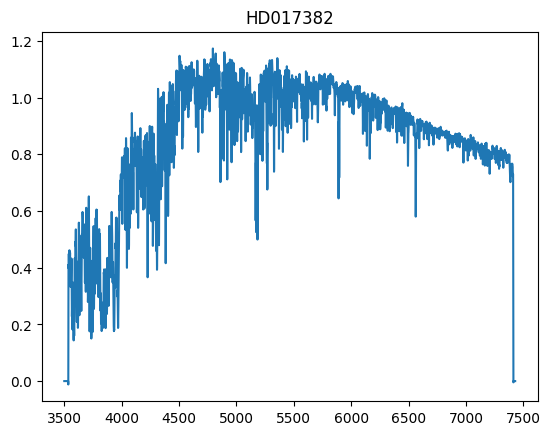

In [4]:
tmp = lib.search_by_id(id=100)
plt.plot(tmp.spectral_axis, tmp.flux[0])
plt.title(tmp.starname)
plt.show()

## Get stars within parameter range

Teff 4514.0 K 4965.0 K
Log(g) 2.09 dex 2.49 dex
[Fe/H] 0.0 dex 0.19 dex


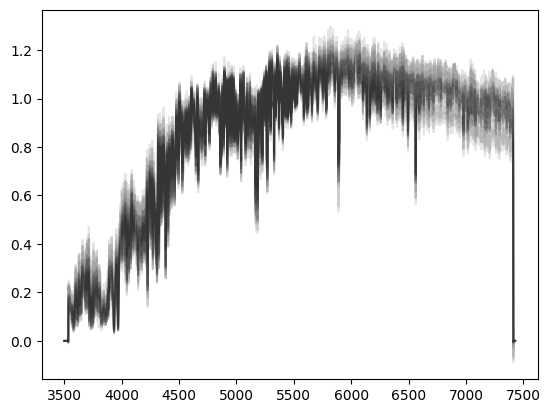

In [5]:
tmp = lib.in_range(
    teff_lims=[4500.0, 5000.0]<<u.K, logg_lims=[2.0, 2.5]<<u.dex, FeH_lims=[0.0, 0.2]<<u.dex
)
print("Teff", np.nanmin(tmp.teff), np.nanmax(tmp.teff))
print("Log(g)", np.nanmin(tmp.logg), np.nanmax(tmp.logg))
print("[Fe/H]", np.nanmin(tmp.FeH), np.nanmax(tmp.FeH))
for s in tmp:
    plt.plot(s.spectral_axis, s.flux, 'k', alpha=0.1)

## Search by params (Gets the closest spectra to those params)

743 5041.0 K 3.04 dex -0.04 dex


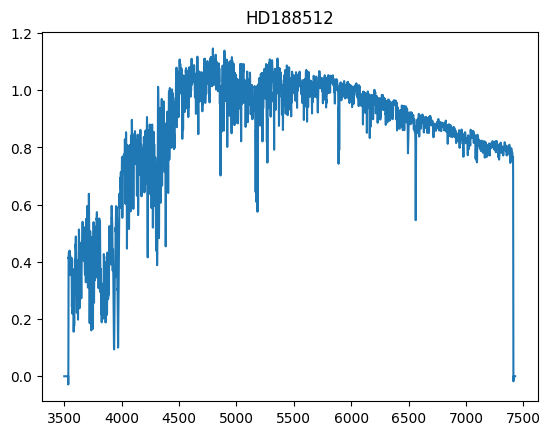

In [6]:
tmp = lib.closest(teff=5000.0*u.K, logg=3.0*u.dex, FeH=0.0*u.dex, MgFe=0.0*u.dex)
print(tmp.id, tmp.teff, tmp.logg, tmp.FeH)
plt.plot(tmp.spectral_axis, tmp.flux)
plt.title(tmp.starname)
plt.show()

## Get spectrum by params (gets interpolated spectrum for those params)

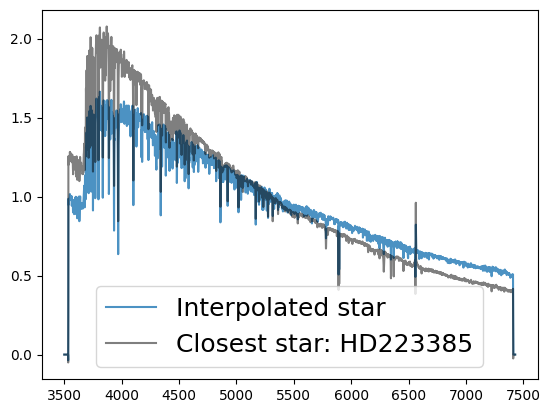

In [7]:
tmp1 = lib.closest(teff=8000.0*u.K, logg=1.0*u.dex, FeH=0.0*u.dex, MgFe=0.0*u.dex)
tmp2 = lib.interpolate(teff=8000.0*u.K, logg=1.0*u.dex, FeH=0.0*u.dex, MgFe=0.0*u.dex)
plt.plot(tmp2.spectral_axis, tmp2.flux, label="Interpolated star", alpha=0.8)
plt.plot(tmp1.spectral_axis, tmp1.flux, 'k', label=f"Closest star: {tmp1.starname}", alpha=0.5)

plt.legend(fontsize=18)
plt.show()